<ErrorbarContainer object of 3 artists>

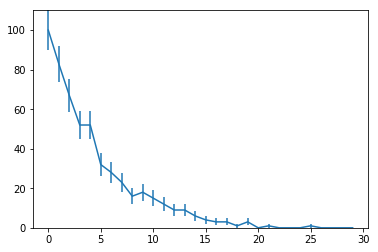

In [40]:
import sqc
import matplotlib.pyplot as plt

Nbits=2

sqc.seed(13)

# Create noise model
nm=sqc.noise.model.simple(
    T1 = 50,
    gate_times = { "H" : 0.0, "CNOT" : 0.0, "Rz" : 10, "X": 0.0 },
    qubit_readout_errors = [ 0.0, 0.0 ],
    gate_depolarization_p = { "X" : 0.0, "CNOT" : 0.0, "Rz" : 0.0, "H" : 0.0 }
)

# Operator
def get_op(t):
    op=sqc.operator(Nbits).X(0)
    for i in range(t):
        op=op.Rz(0,0) # just wait for 1mus
    return op

def val(d,x):
    return d[x] if x in d else 0

# Initial state
s0=sqc.state(Nbits)

# Sample
x=range(30)
y=[ val(sqc.noise.sample(nm,get_op(i),s0,100),1) for i in x ]
yerr=[ n**0.5 for n in y ]

plt.ylim(0,110)
plt.errorbar(x,y,yerr=yerr)